In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("steam_games_v3.csv")

In [4]:
df["developer"] = df["developer"] .astype("string") 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31910 entries, 0 to 31909
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   publisher                   23897 non-null  object 
 1   app_name                    31910 non-null  object 
 2   title                       29904 non-null  object 
 3   url                         31910 non-null  object 
 4   release_date                29895 non-null  object 
 5   tags                        31748 non-null  object 
 6   discount_price              31910 non-null  float64
 7   reviews_url                 31910 non-null  object 
 8   price                       30756 non-null  float64
 9   early_access                31910 non-null  int64  
 10  id                          31910 non-null  float64
 11  developer                   28655 non-null  string 
 12  sentiment                   27723 non-null  object 
 13  metascore                   260

### Acá podemos ver los diferentes outliers (que enrealidad no son outliers pero no nos sirven para entrenar los datos)

In [6]:


df =  df.loc[:, :"Captions available"]

bins = [30, 60, 80, 90,  float('inf')]
labels = ["Menores a 30",  '30-60', "60-80", "80-90",]
df["grupo_metascore"] = pd.cut(df["metascore"], bins=bins, labels=labels, right=False)

In [7]:
df.drop(columns="tags", inplace = True)

Text(0.5, 1.0, 'Distribución de Edades en Grupos')

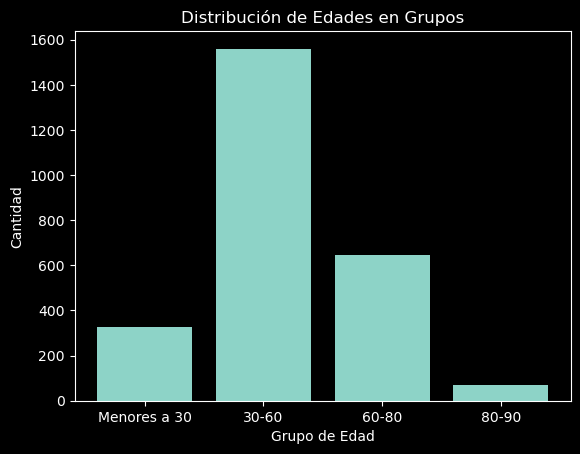

In [8]:
grupos_metascore_counts = df["grupo_metascore"].value_counts()

grupo_edad_counts = grupos_metascore_counts.reindex(labels)


plt.bar(grupo_edad_counts.index, grupo_edad_counts.values)

# Agregar etiquetas y título al gráfico
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades en Grupos')


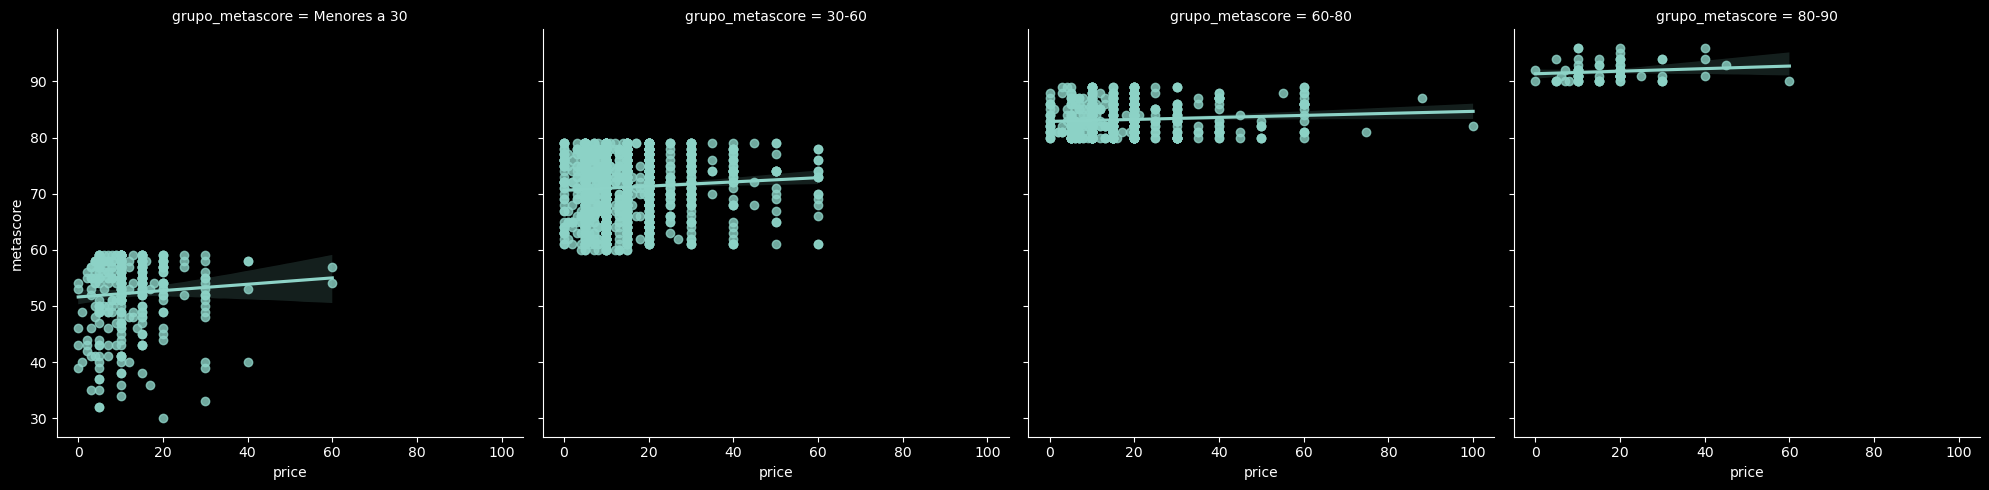

In [9]:
sns.lmplot(x="price", y="metascore",col="grupo_metascore", data=df)

In [10]:
developers =  df["developer"].value_counts().index

<AxesSubplot:xlabel='price', ylabel='grupo_metascore'>

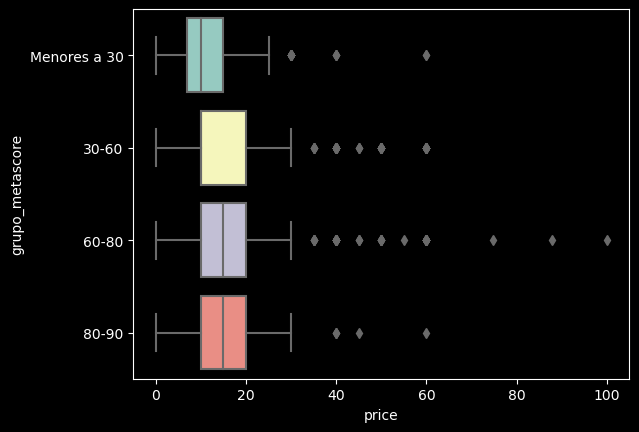

In [11]:
sns.boxplot(x="price", y="grupo_metascore", data=df )

In [12]:
df2 = df.drop(
        df[df["sentiment"].str.contains(" user reviews", na=False)].index
    )

df2.dropna(subset="developer", inplace=True)

In [28]:
max_app_name_developer = df2.groupby(["developer","app_name"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
encoder = OneHotEncoder()

# Ajustar y transformar los datos usando el LabelEncoder
df2["sentiment_modificado"] = label_encoder.fit_transform(df2["sentiment"])
data_developer = df2["developer"].unique().tolist()
# Convertir "data_developer" a un DataFrame
data_developer_df = pd.DataFrame(data_developer, columns=["developer"])

# Aplicar One-Hot Encoding a la columna "developer" utilizando get_dummies
one_hot_encoded_developer = pd.get_dummies(data_developer_df, columns=["developer"], prefix=["developer "])

# Unir el DataFrame original con las nuevas columnas codificadas
df2 = pd.concat([df2, one_hot_encoded_developer], axis=1)

In [17]:
df2

,publisher,app_name,title,url,release_date,discount_price,reviews_url,price,early_access,id,...,developer _洋葱头科技,developer _灰烬天国,developer _疯王子,"developer _神奈川電子技術研究所,EXTREME",developer _自由愉悦小黄猫(Free pleasure little yellow cat),developer _致意,developer _萌石游戏,developer _高考恋爱委员会,"developer _高考恋爱委员会,Days","developer _高考恋爱委员会,橘子班"
0,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,4.49,http://steamcommunity.com/app/761140/reviews/?...,4.99,0.0,761140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Making Fun, Inc.",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.00,http://steamcommunity.com/app/643980/reviews/?...,0.00,0.0,643980.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,0.00,http://steamcommunity.com/app/670290/reviews/?...,0.00,0.0,670290.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,彼岸领域,弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,0.83,http://steamcommunity.com/app/767400/reviews/?...,0.99,0.0,767400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Trickjump Games Ltd,Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,0.00,http://steamcommunity.com/app/772540/reviews/?...,3.99,0.0,772540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.corr()

df2 = df2[df2["price"] <= 60]

In [ ]:
df2["developer"].isnull().sum()

0